In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5242 - accuracy: 0.8052 - val_loss: 0.4117 - val_accuracy: 0.8423
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3615 - accuracy: 0.8649 - val_loss: 0.3444 - val_accuracy: 0.8746
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3115 - accuracy: 0.8837 - val_loss: 0.3138 - val_accuracy: 0.8839
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2765 - accuracy: 0.8953 - val_loss: 0.3069 - val_accuracy: 0.8883
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2526 - accuracy: 0.9039 - val_loss: 0.2951 - val_accuracy: 0.8947
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2297 - accuracy: 0.9135 - val_loss: 0.3061 - val_accuracy: 0.8948
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2121 - accuracy: 0.9184 - val_loss: 0.3093 - val_accura

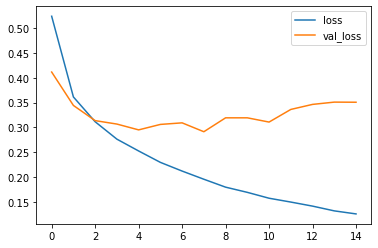

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

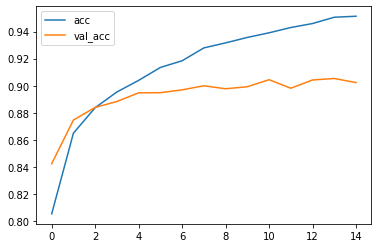

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

 

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)



[[848   2  25  25   2   1  90   0   7   0]
 [  4 979   0  11   3   0   1   0   2   0]
 [ 15   3 884  10  42   0  43   0   3   0]
 [ 12   4  21 908  20   1  32   0   2   0]
 [  0   2  66  22 834   0  74   0   2   0]
 [  0   1   0   0   0 976   0  18   0   5]
 [ 92   1  89  24  90   0 692   0  12   0]
 [  0   0   0   1   0   6   0 981   0  12]
 [  1   0   4   4   2   3   4   2 978   2]
 [  1   0   0   0   0  10   0  46   0 943]]


In [12]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

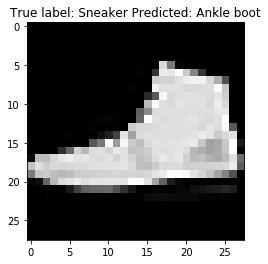

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));